In [30]:
import sys
import numpy as np
from rplidar import RPLidar


PORT_NAME = '/dev/ttyUSB0'

lidar = RPLidar(PORT_NAME)

info = lidar.get_info()
print(info)
health = lidar.get_health()
print(health)

scans = 5000

lidar = RPLidar(PORT_NAME)
data = []
for i, scan in enumerate(lidar.iter_scans()):
        data.append(np.array([(np.radians(meas[1]), meas[2]) for meas in scan]))
        if i % 100 ==0:
            print('%d: Got %d measurments' % (i, len(scan)))
        if i > scans-1:
            break
lidar.stop()
lidar.stop_motor()
lidar.disconnect()

{'model': 24, 'firmware': (1, 25), 'hardware': 5, 'serialnumber': 'A5FA9AF2C1EA98D4BEEB9CF02A293517'}
('Good', 0)
0: Got 173 measurments
100: Got 241 measurments
200: Got 244 measurments
300: Got 235 measurments
400: Got 258 measurments
500: Got 261 measurments
600: Got 249 measurments
700: Got 238 measurments
800: Got 235 measurments
900: Got 255 measurments
1000: Got 264 measurments
1100: Got 255 measurments
1200: Got 241 measurments
1300: Got 233 measurments
1400: Got 256 measurments
1500: Got 264 measurments
1600: Got 255 measurments
1700: Got 256 measurments
1800: Got 234 measurments
1900: Got 256 measurments
2000: Got 264 measurments
2100: Got 252 measurments
2200: Got 247 measurments
2300: Got 233 measurments
2400: Got 257 measurments
2500: Got 266 measurments
2600: Got 250 measurments
2700: Got 250 measurments
2800: Got 234 measurments
2900: Got 259 measurments
3000: Got 266 measurments
3100: Got 252 measurments
3200: Got 234 measurments
3300: Got 235 measurments
3400: Got 251 

In [32]:
q = []
for d in data:
    for dd in d:
        q.append(dd[1])
DMAX = max(q)
q=None
print(DMAX)

9688.0


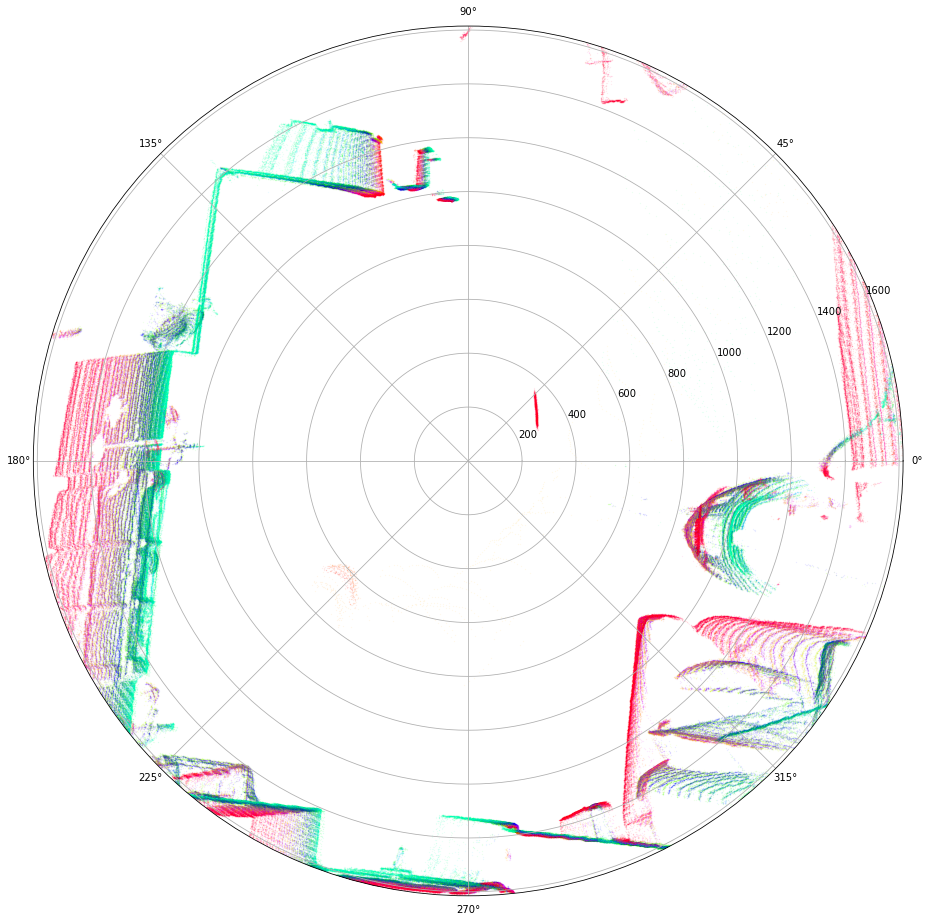

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure(figsize=(16,16))
ax = plt.subplot(111, projection='polar')

n = 500 #len(data)
ax.set_prop_cycle('color', [plt.cm.hsv(i) for i in np.linspace(0, 1, n)])

for d in data:
    line = ax.scatter(d[:,0], d[:,1], alpha=0.1, s=0.1)
ax.set_rmax(DMAX/6)
ax.grid(True)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

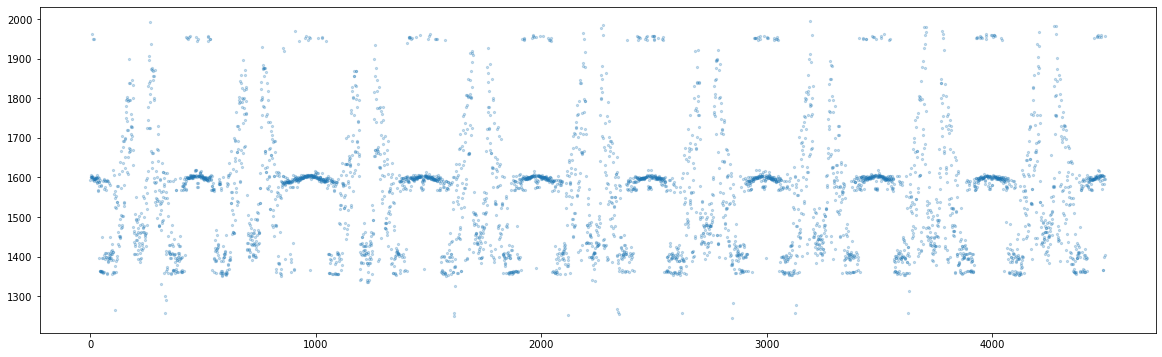

In [101]:
q = []
i = 0
for d in data:
    if i > 500:
        q.append(list(d[200]))
    i=i+1
    
fig = plt.figure(figsize=(20,6))
ax = plt.subplot(111)
x = range(len(q))
y = [_[1] for _ in q]
ax.scatter(x,y,alpha=0.25,s=5)
ax.xticks(np.arange(0, len(q), step=500))
#ax.set_ylim(6,7)

ax.grid(True)
plt.show()

In [76]:
[_[0] for _ in q]

TypeError: list indices must be integers or slices, not tuple